In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
nflx = pd.read_csv("NFLX_stock_data.csv")
nflx.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
1,Date,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,4.984857082366943,5.033143043518066,4.873143196105957,4.915143013000488,134750000
3,2015-01-05,4.731142997741699,4.925857067108154,4.714714050292969,4.925857067108154,181650000
4,2015-01-06,4.650143146514893,4.763999938964844,4.566143035888672,4.734714031219482,160377000


In [3]:
nflx = nflx.iloc[2:].reset_index(drop=True)
nflx.head()

,Price,Close,High,Low,Open,Volume
0,2015-01-02,4.984857082366943,5.033143043518066,4.873143196105957,4.915143013000488,134750000
1,2015-01-05,4.731142997741699,4.925857067108154,4.714714050292969,4.925857067108154,181650000
2,2015-01-06,4.650143146514893,4.763999938964844,4.566143035888672,4.734714031219482,160377000
3,2015-01-07,4.674285888671875,4.742143154144287,4.627142906188965,4.734714031219482,98497000
4,2015-01-08,4.7779998779296875,4.783570766448975,4.647857189178467,4.711999893188477,96019000


In [5]:
nflx.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
nflx["Date"] = pd.to_datetime(nflx["Date"])
nflx.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,4.984857082366943,5.033143043518066,4.873143196105957,4.915143013000488,134750000
1,2015-01-05,4.731142997741699,4.925857067108154,4.714714050292969,4.925857067108154,181650000
2,2015-01-06,4.650143146514893,4.763999938964844,4.566143035888672,4.734714031219482,160377000
3,2015-01-07,4.674285888671875,4.742143154144287,4.627142906188965,4.734714031219482,98497000
4,2015-01-08,4.7779998779296875,4.783570766448975,4.647857189178467,4.711999893188477,96019000


In [8]:
cols = ["Close", "High", "Low", "Open", "Volume"]
nflx[cols] = nflx[cols].astype(float)
nflx.set_index("Date", inplace=True)
nflx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2776 entries, 2015-01-02 to 2026-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2776 non-null   float64
 1   High    2776 non-null   float64
 2   Low     2776 non-null   float64
 3   Open    2776 non-null   float64
 4   Volume  2776 non-null   float64
dtypes: float64(5)
memory usage: 130.1 KB


In [10]:
nflx.describe()

,Close,High,Low,Open,Volume
count,2776.000000,2776.000000,2776.000000,2776.000000,2.776000e+03
mean,40.656174,41.221234,40.059740,40.649234,8.450180e+07
std,28.724892,29.042170,28.382441,28.725432,7.786949e+07
min,4.554714,4.678571,4.526429,4.602143,1.144000e+07
25%,18.158250,18.485250,17.787000,18.133999,3.921900e+07
50%,35.149500,35.772999,34.616499,35.187500,6.107150e+07
75%,52.314751,53.027999,51.517749,52.115252,1.013775e+08
max,133.912994,134.115005,132.121002,133.822998,1.333875e+09


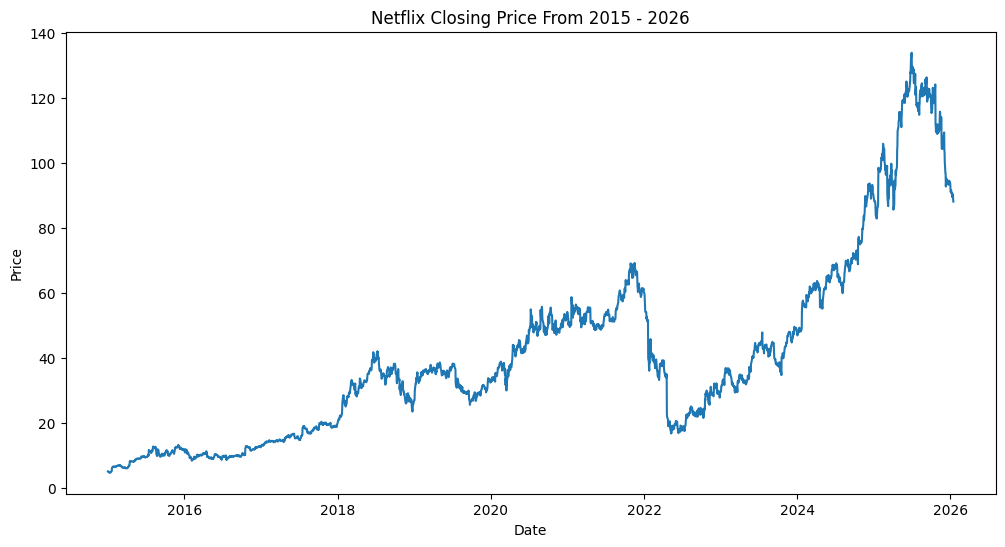

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(nflx.index, nflx["Close"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Netflix Closing Price From 2015 - 2026");

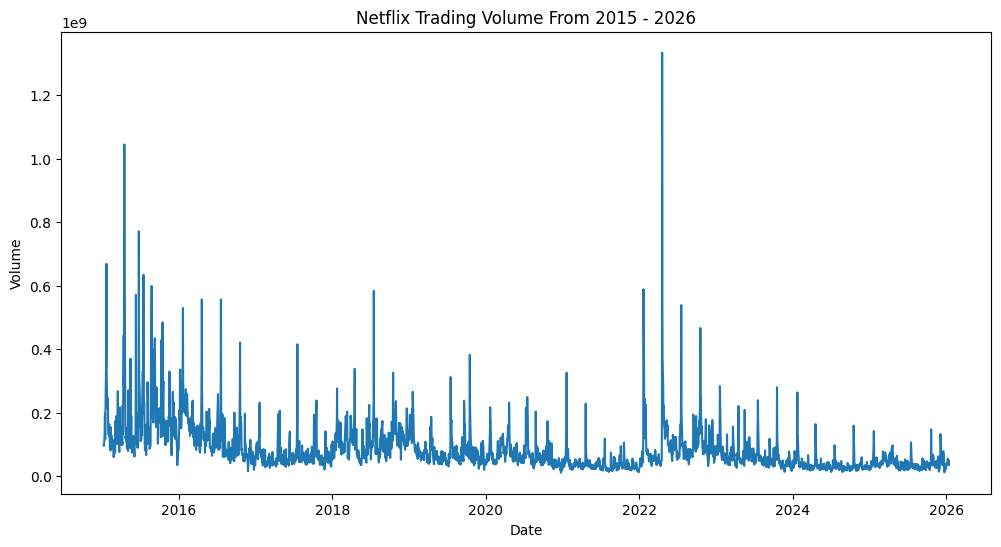

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(nflx.index, nflx["Volume"])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Netflix Trading Volume From 2015 - 2026");

In [21]:
nflx["Returns"] = nflx["Close"].pct_change()
nflx.dropna(inplace=True)
nflx.head()

,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2015-01-08,4.778000,4.783571,4.647857,4.712000,96019000.0,0.022188
2015-01-09,4.704143,4.802000,4.689857,4.763143,95781000.0,-0.015458
2015-01-12,4.554714,4.719857,4.526429,4.709000,129444000.0,-0.031765
2015-01-13,4.625571,4.704857,4.590000,4.602143,187215000.0,0.015557
2015-01-14,4.632000,4.737000,4.568000,4.707143,198849000.0,0.001390


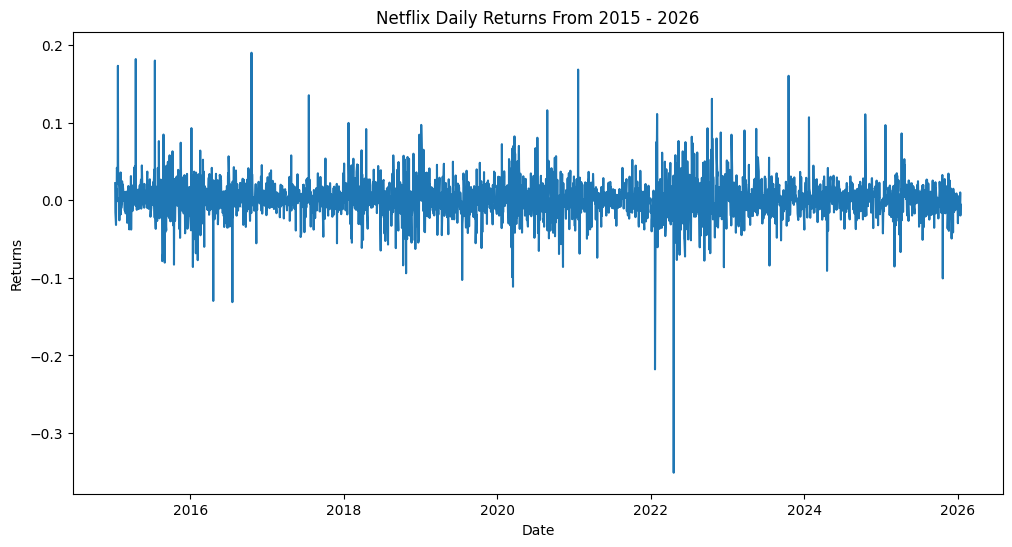

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(nflx.index, nflx["Returns"])
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Netflix Daily Returns From 2015 - 2026");

In [26]:
nflx["Volatility_30"] = nflx["Returns"].rolling(30).std()
nflx["Volatility_21"] = nflx["Returns"].rolling(21).std()
nflx.dropna(inplace=True)
nflx.info()
nflx.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2714 entries, 2015-04-02 to 2026-01-15
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          2714 non-null   float64
 1   High           2714 non-null   float64
 2   Low            2714 non-null   float64
 3   Open           2714 non-null   float64
 4   Volume         2714 non-null   float64
 5   Returns        2714 non-null   float64
 6   Volatility_30  2714 non-null   float64
 7   Volatility_21  2714 non-null   float64
dtypes: float64(8)
memory usage: 190.8 KB


,Close,High,Low,Open,Volume,Returns,Volatility_30,Volatility_21
Date,,,,,,,,
2015-04-02,5.915429,5.960714,5.886143,5.907143,98644000.0,0.002324,0.016739,0.018599
2015-04-06,6.033000,6.044714,5.846429,5.876857,107303000.0,0.019875,0.017187,0.019428
2015-04-07,6.049429,6.084857,6.004286,6.049714,99771000.0,0.002723,0.017137,0.018664
2015-04-08,6.305000,6.310714,6.118429,6.120143,223279000.0,0.042247,0.018996,0.020749
2015-04-09,6.278571,6.313571,6.211429,6.300000,134554000.0,-0.004192,0.018913,0.020071


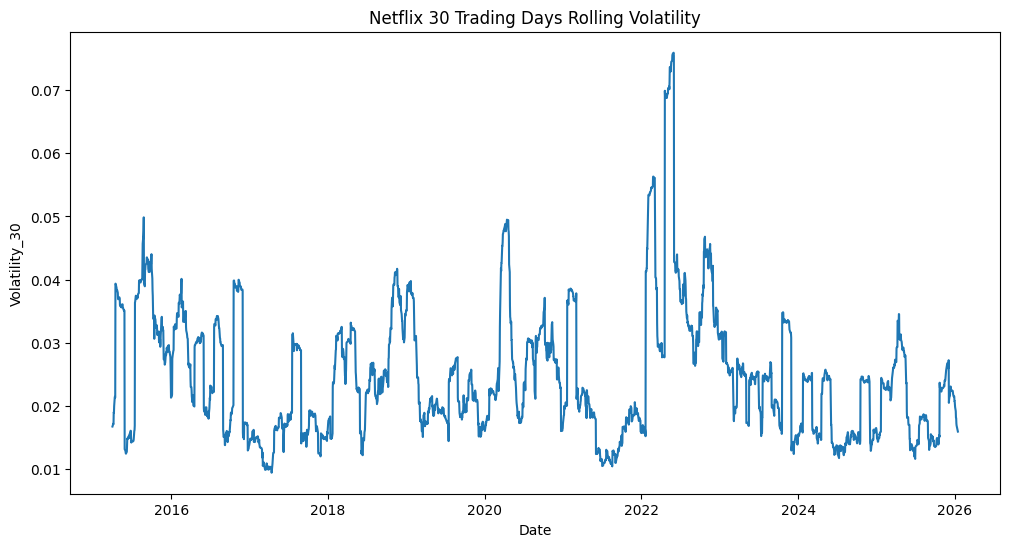

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(nflx.index, nflx["Volatility_30"])
plt.xlabel("Date")
plt.ylabel("Volatility_30")
plt.title("Netflix 30 Trading Days Rolling Volatility");

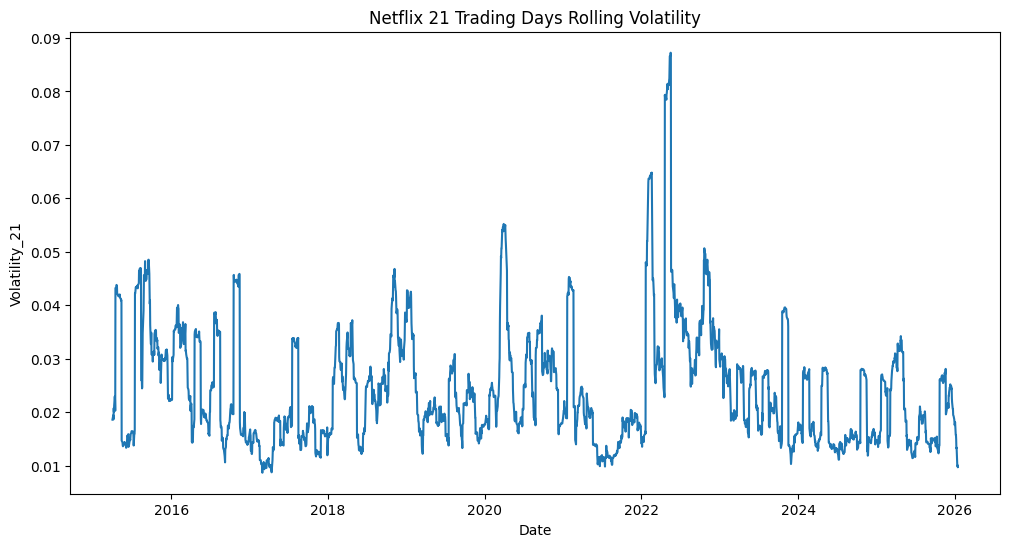

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(nflx.index, nflx["Volatility_21"])
plt.xlabel("Date")
plt.ylabel("Volatility_21")
plt.title("Netflix 21 Trading Days Rolling Volatility");

In [32]:
nflx["MA_10"] = nflx["Close"].rolling(10).mean()
nflx["MA_50"] = nflx["Close"].rolling(50).mean()
nflx.dropna(inplace=True)
nflx.head()

,Close,High,Low,Open,Volume,Returns,Volatility_30,Volatility_21,MA_10,MA_50
Date,,,,,,,,,,
2015-10-30,10.838,11.010,10.490,10.512,155715000.0,0.031012,0.031593,0.032066,10.2141,10.39524
2015-11-02,10.764,10.937,10.630,10.920,117846000.0,-0.006828,0.031294,0.032119,10.2736,10.40260
2015-11-03,10.974,11.105,10.724,10.736,124841000.0,0.019509,0.031176,0.030573,10.3811,10.42832
2015-11-04,11.405,11.428,10.939,11.036,175050000.0,0.039275,0.031783,0.031121,10.5420,10.45338
2015-11-05,11.350,11.568,11.172,11.375,138149000.0,-0.004822,0.030238,0.031148,10.7038,10.46012


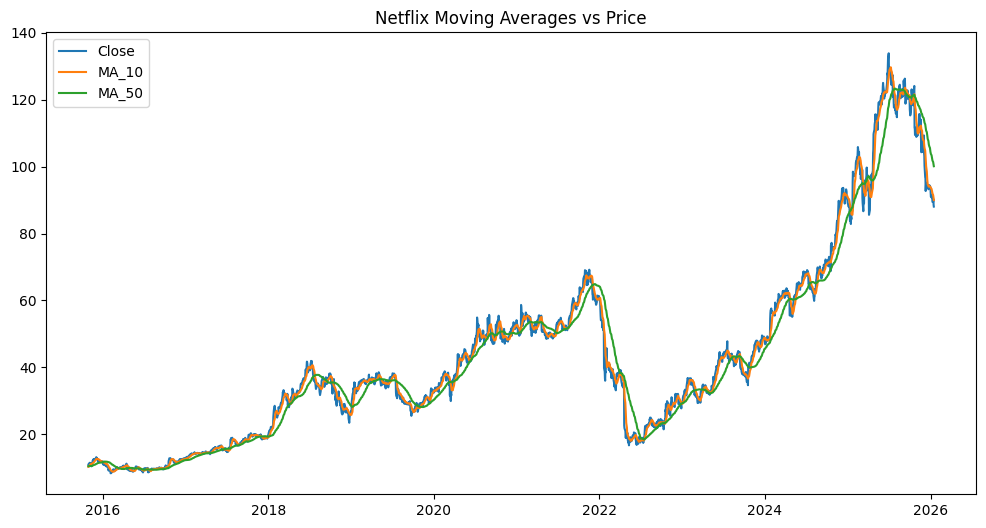

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(nflx["Close"], label="Close")
plt.plot(nflx["MA_10"], label="MA_10")
plt.plot(nflx["MA_50"], label="MA_50")
plt.title("Netflix Moving Averages vs Price")
plt.legend();

In [38]:
nflx['Lag_1'] = nflx['Close'].shift(1)
nflx['Lag_5'] = nflx['Close'].shift(5)
nflx['Lag_10'] = nflx['Close'].shift(10)
nflx.dropna(inplace=True)
nflx.head()

,Close,High,Low,Open,Volume,Returns,Volatility_30,Volatility_21,MA_10,MA_50,Lag_1,Lag_5,Lag_10
Date,,,,,,,,,,,,,
2015-12-14,12.067,12.090,11.466,11.977,186793000.0,0.014801,0.028831,0.030596,12.5107,11.36660,11.891,12.536,12.333
2015-12-15,11.860,12.330,11.854,12.193,117600000.0,-0.017154,0.029025,0.028545,12.4430,11.38130,12.067,12.698,12.537
2015-12-16,12.264,12.300,11.809,11.980,131810000.0,0.034064,0.029419,0.024909,12.3801,11.40992,11.860,12.420,12.893
2015-12-17,12.251,12.635,12.242,12.397,172849000.0,-0.001060,0.028669,0.022504,12.3371,11.43874,12.264,12.291,12.681
2015-12-18,11.802,12.219,11.792,12.085,179481000.0,-0.036650,0.029536,0.023098,12.2080,11.44492,12.251,11.891,13.093
